# Проблематика
Проблематика задачи заключается в привлечении и увеличении покупок пользователей. В условиях растущей конкуренции создание рекомендательной системы является критически важным для удовлетворения клиентов и повышения продаж.

# Цель
Цель: Разработка алгоритма генерации персонализированных предложений на основании предыдущих заказов и заказов других пользователей. Входными данными будут служить данные о заказах товаров различными пользователями. Выходными данными будет являться список рекомендованных товаров для пользователя упорядоченный по вероятности покупки.

# Представление данных
Данные представлены в виде csv таблицы. Каждая строка содержит идентификатор пользователя, товара и время заказа. На основе этих данных, рассматривая совпадения между заказами пользователей, можно составить список рекомендуемых к покупке товаров для конкретного пользователя. Соответственно, представленные данные пригодны для анализа.

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from matplotlib.ticker import MaxNLocator

In [283]:
# Read data and delete duplicates
data = pd.read_csv('data.csv')

In [284]:
data.count()

user_id     21265784
item_id     21265784
order_ts    21265784
dtype: int64

In [285]:
# Clearing empty crlls
data.dropna(inplace=True)

In [286]:
data.count()

user_id     21265784
item_id     21265784
order_ts    21265784
dtype: int64

Пропущенных данных нет, так как в каждом столбце одинаковое количество значений.

In [288]:
# Duplicaties removal
data.drop_duplicates(keep='first', inplace=True)

In [289]:
# Quantity of bought goods by a specific user
users = data['user_id'].value_counts()
users

user_id
173306    3339
305110    2587
815043    2579
42097     2464
570310    2097
          ... 
162064       1
747703       1
495054       1
600871       1
342597       1
Name: count, Length: 1057265, dtype: int64

In [290]:
data['user_id'].value_counts().describe()

count    1.057265e+06
mean     1.821614e+01
std      2.562597e+01
min      1.000000e+00
25%      3.000000e+00
50%      1.000000e+01
75%      2.400000e+01
max      3.339000e+03
Name: count, dtype: float64

Определено, сколько товаров купил каждый пользователь. Также определены количество, среднее значение, стандартное отклонение и т.п.

In [292]:
# Purchasing power of users
users_list = pd.DataFrame(users)
users_list['purchasing power'] = users_list['count'].apply(lambda x: 'high' if  x > 100 else 'mid' if x > 30 else 'low' )
users_list

,count,purchasing power
user_id,,
173306,3339,high
305110,2587,high
815043,2579,high
42097,2464,high
570310,2097,high
...,...,...
162064,1,low
747703,1,low
495054,1,low


<BarContainer object of 3 artists>

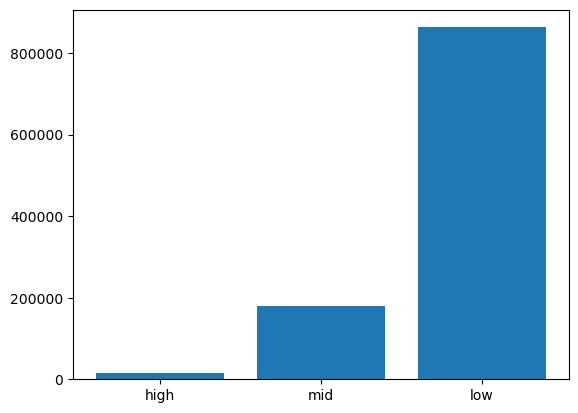

In [293]:
groups = users_list["purchasing power"].unique()
counts = [users_list["purchasing power"].value_counts(sort=False).iloc[x] for x in range(len(users_list["purchasing power"].value_counts(sort=False)))]
plt.bar(groups[:len(counts)], counts)

На основании количества покупок, определили "покупательскую силу" каждого пользователя

In [295]:
# Quantity of specific good that was sold
data['item_id'].value_counts()

item_id
192     404127
69      326097
390     305835
357     280828
11      273874
         ...  
5898         1
6562         1
6254         1
5909         1
7384         1
Name: count, Length: 6562, dtype: int64

In [296]:
data['item_id'].value_counts().describe()

count      6562.000000
mean       2934.972112
std       14037.097527
min           1.000000
25%          32.000000
50%         210.000000
75%        1155.500000
max      404127.000000
Name: count, dtype: float64

Узнали, сколько видов каждого товара купили и какие самые покупаемые товары. Также определены количество, среднее значение, стандартное отклонение и т.п.

In [298]:
# Current timestamp
current_timestamp = datetime.strptime(datetime.now().isoformat()[:10] + ' ' + datetime.now().isoformat()[11:], '%Y-%m-%d %H:%M:%S.%f').timestamp()
stamps = data["order_ts"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp())

In [299]:
# Recency calculation
data['recency'] = stamps.apply(lambda x: 'recent order' if current_timestamp - x < 44582400 else 'decent order' if current_timestamp - x < 47174400 else 'old order' )
data

,user_id,item_id,order_ts,recency
0,550614,264,2023-01-01 00:28:09.000000,old order
1,571051,580,2023-01-01 00:41:47.000000,old order
2,571051,180,2023-01-01 00:41:47.000000,old order
3,47164,5135,2023-01-01 00:53:35.000000,old order
4,219072,2668,2023-01-01 01:02:29.000000,old order
...,...,...,...,...
21265778,456675,5507,2023-03-31 23:48:07.498359,recent order
21265779,249269,348,2023-03-31 23:55:37.182803,recent order
21265780,373951,3835,2023-03-31 23:59:24.148327,recent order
21265781,505474,1340,2023-03-31 23:59:24.161567,recent order


Классифицировали заказы по давности. Недавние заказы используем в первую очередь.

In [301]:
# Orders by data
data['order_ts'].value_counts()

order_ts
2023-03-13 16:25:54.593448    139
2023-02-14 10:30:38.283756    119
2023-03-20 19:45:20.386081    116
2023-02-27 11:12:32.471646    114
2023-01-10 08:24:31.000000    107
                             ... 
2023-02-07 16:14:46.854091      1
2023-02-07 16:14:58.000000      1
2023-02-07 16:15:48.000000      1
2023-02-07 16:16:06.274908      1
2023-03-31 23:59:24.148327      1
Name: count, Length: 14860520, dtype: int64

Узнали количество заказов в определенный момент времени и определили самые популярные моменты для покупок.

In [303]:
data["month"] = data["order_ts"].str[5:7].astype(int)
data["season"] = data["month"].apply(lambda x: "winter" if x in [12, 1, 2] else "spring" if x in [3, 4, 5] else "summer" if x in [6, 7, 8] else "autumn" if x in [9, 10, 11] else "month not found")
data

,user_id,item_id,order_ts,recency,month,season
0,550614,264,2023-01-01 00:28:09.000000,old order,1,winter
1,571051,580,2023-01-01 00:41:47.000000,old order,1,winter
2,571051,180,2023-01-01 00:41:47.000000,old order,1,winter
3,47164,5135,2023-01-01 00:53:35.000000,old order,1,winter
4,219072,2668,2023-01-01 01:02:29.000000,old order,1,winter
...,...,...,...,...,...,...
21265778,456675,5507,2023-03-31 23:48:07.498359,recent order,3,spring
21265779,249269,348,2023-03-31 23:55:37.182803,recent order,3,spring
21265780,373951,3835,2023-03-31 23:59:24.148327,recent order,3,spring
21265781,505474,1340,2023-03-31 23:59:24.161567,recent order,3,spring


Добавлены колонки с месяцем и временем года покупки.

<BarContainer object of 2 artists>

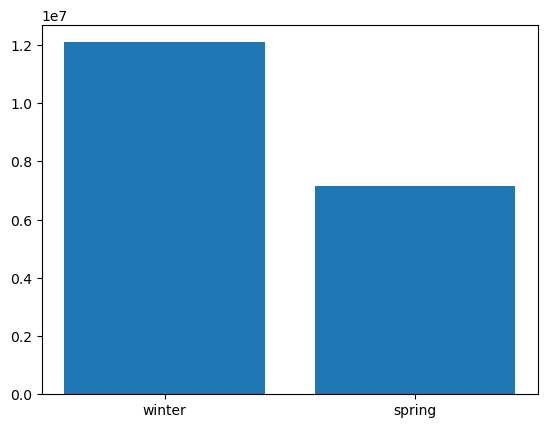

In [305]:
# Orders by season
groups = ['winter', 'spring', 'summer', 'autumn']
counts = [data["season"].value_counts().iloc[x] for x in range(len(data["season"].value_counts()))]
plt.bar(groups[:len(counts)], counts)

Представлен график покупок по времени года. На его основании можно сделать вывод о том, что большинство покупок было сделано зимой

<BarContainer object of 3 artists>

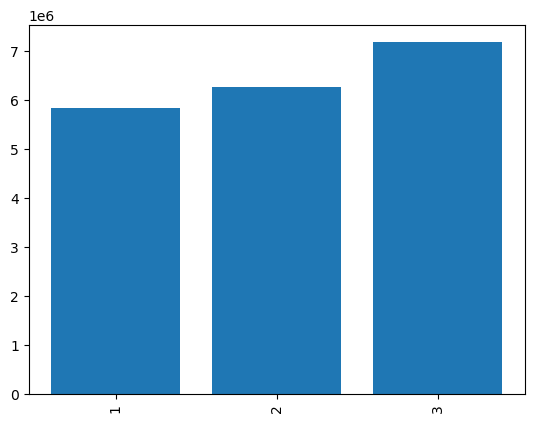

In [307]:
# Orders by month
groups = data['month']
counts = [data["month"].value_counts(sort=False).iloc[x] for x in range(len(data["month"].value_counts(sort=False)))]
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.bar(groups.unique(), counts)

Исходя из гистограммы, большинство покупок было сделано в третьем месяце.

<BarContainer object of 90 artists>

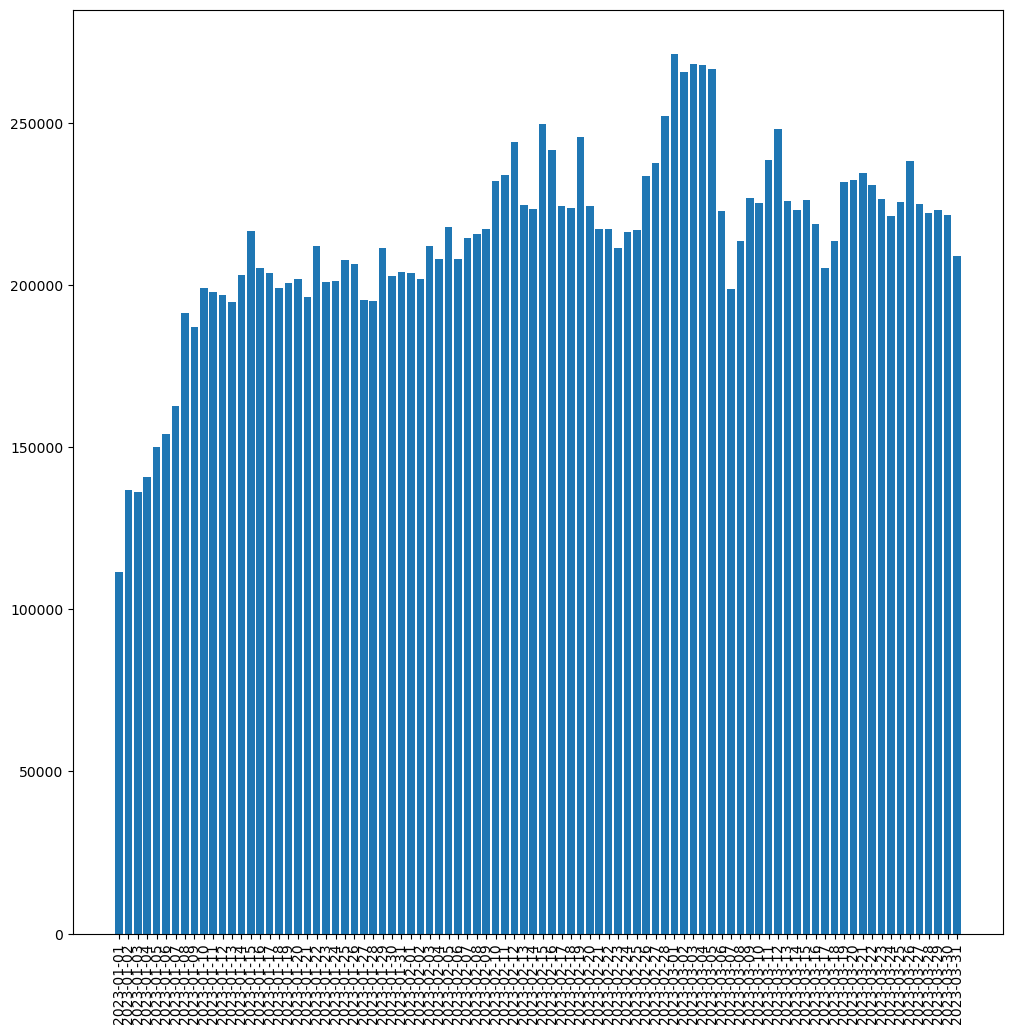

In [309]:
# Orders distribution
dates = data["order_ts"].apply(lambda x: x[:10])
count = [dates.value_counts().sort_index().iloc[x] for x in range(len(dates.value_counts()))]
plt.figure(figsize=(12, 12))
plt.xticks(rotation=90)
plt.bar(dates.unique(), count)

Распределение заказов по дням.

In [311]:
repeated_days = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
dates_frame = pd.DataFrame({'date': dates.unique()})
repeats = len(dates_frame) // len(repeated_days) + 1
dates_frame['weekdays'] = np.tile(repeated_days, repeats)[:len(dates_frame)]
dates_frame.set_index('date', inplace=True)
dates_frame

,weekdays
date,
2023-01-01,sunday
2023-01-02,monday
2023-01-03,tuesday
2023-01-04,wednesday
2023-01-05,thursday
...,...
2023-03-27,monday
2023-03-28,tuesday
2023-03-29,wednesday


Определим день недели в каждую дату.

In [313]:
final_dates = pd.DataFrame(dates, index=dates)
del final_dates['order_ts']
final_dates = final_dates.join(dates_frame)

<BarContainer object of 7 artists>

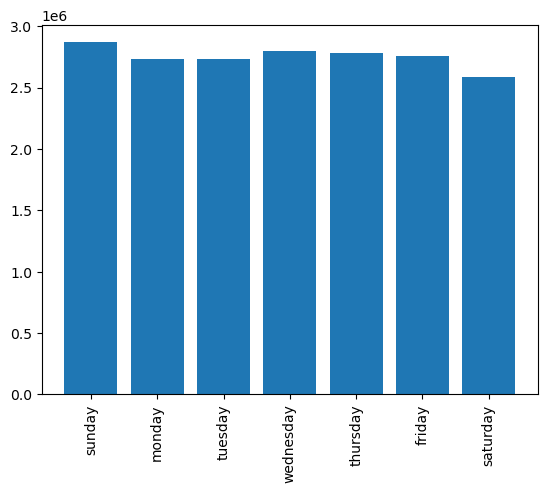

In [314]:
count = [final_dates['weekdays'].value_counts(sort=False).iloc[x] for x in range(len(final_dates['weekdays'].value_counts(sort=False)))]
plt.xticks(rotation=90)
plt.bar(repeated_days, count)

Исходя из полученного распределения, можно сделать вывод о том, что больше всего заказов совершалось в воскресенье.

# Сравнение подходов к решению задачи рекомендательной системы
|Подход|Достоинства|Недостатки|
|:---------|:--------:|---------:|Коллаборативная фильтрация.|Рекомендации даются на основе интересов других похожих пользователей.В результате работы коллаборативной фильтрации можно получать как прогнозы, так и рекомендации.|Холодный старт(неполнота и недостаточность информации в самом начале о новом продукте, услуге, а так же и о пользователе), масштабируемость (невозможность моментального отклика системы из-за сложных расчетов алгоритма коллаборативной фильтрации вмещающем информацию о большом количестве пользователей и предметов в системе), разреженность данных (пользователи не всегда ставят оценки всем приобретенным товарам, из-за чего построенная системой матрица «предмет-пользователь» получается очень большой и разреженной, что приводит к сложности расчета рекомендаций). 
|Контентная фильтрация.|Процесс рекомендации базируется на особенностях предыдущих действий пользователя, а интересы других пользователей никак на него не влияют. Также, в случае изменения профиля пользователя система может скорректировать предсказания за достаточно короткое время.|Требует обязательного описания товара и предыдущих оценок пользователя. 
 Гибридная фильтрация.|Cочетает в себе различные методы и подходы, что позволяет минимизировать ошибки в процессе рекомендаций. Идея подхода заключается в том, что недостатки одного метода нивелируется преимуществами другого.|Сложно объединить различные алгоритмы и подходы, что требует значительных усилий и ресурсов. Необходимость настройки множества гиперпараметров для каждого метода может усложнить процесс.|

Из-за того, что данный датасет содержит в себе лишь данные о заказах и не содержит данных о товарах и оценках пользователя, оптимальным выбором будет коллаборативная фильтрация. Рассмотрим алгоритмы, использующиеся в коллаборативной фильтрации.
|Алгоритм|Достоинства|Недостатки|
|:---------|:--------:|---------:|
|Методы на основе соседей. KNN (k-Nearest Neighbors).|Такие алгоритмы просты в реализации, их легко понять и реализовать. Результаты работы таких алгоритмов легко интерпретировать и они достаточно универсальны.|Плохая эффективность на больших наборах данных, сложности в нахождении схожестей при разреженных матрицах взаимодействий и сложности в рекомендации при малом количестве информации.|
|Матричная факторизация. SVD, ALS, NMF.|Эффективно работает с разреженными матрицами, благодаря выявлению скрытых паттернов засчёт ALS. Уменьшая размерность данных, способствует снижению вычислительных затрат.|При отсутствии предыдущих данных, модель затрудняется в предсказании предпочтений. Сложность настройки гиперпараметров увеличивает вероятность overfitting'а или underfitting'а. Также модели матричной факторизации трудны для интерпретации, что усложняет их понимание.|
|Генеративные модели.|Генеративные модели устойчивы к недостаткам данных, так как могут сами создавать синтетические данные. Они универсальные и могут быть адаптированы для различных типов данных.|Такие модели сложны в реализации и обучении. Они чувствительны к гиперпараметрам. Для качественного обучения требуется большое количество данных.|

Рассмотрев достоинства и недостатки, можно сделать вывод о том, что для данной задачи эффективнее всего использовать методы на основе соседей или матричную факторизацию. Генеративные модели сложны в реализации, а на текущих данных их использование излишне. Если выбирать между двумя оставшимися методами, то эффективнее будет использовать KNN, так как данные достаточно полны и между ними несложно найти сходства.  |    |